In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

In [2]:
directory = 'Img'
files=os.listdir(directory)
print(files[0:5])
print(len(files))

['img001-001.png', 'img001-002.png', 'img001-003.png', 'img001-004.png', 'img001-005.png']
3410


In [3]:
# filename and image data
datafile=[]
data=[]
for file in files:
    image=load_img(os.path.join(directory,file),grayscale=True,color_mode='rgb',target_size=(40,40))
    image=img_to_array(image)
    image=image/255.0
    data+=[image]
    datafile+=[file]
print(datafile[0:5])
print(len(datafile))

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


['img001-001.png', 'img001-002.png', 'img001-003.png', 'img001-004.png', 'img001-005.png']
3410


In [4]:
data1=np.array(data)

In [5]:
# filename and label
engl=pd.read_csv('english.csv')
engl.head()

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


In [6]:
factlabel=pd.factorize(engl['label'])

print(factlabel[0])
print(factlabel[1])

[ 0  0  0 ... 61 61 61]
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
       'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
       'u', 'v', 'w', 'x', 'y', 'z'],
      dtype='object')


In [7]:
labelfile=[]
for item in engl['image']:
    labelfile+=[item[4:]]
engl['file']=labelfile
engl['labeln']=factlabel[0]

print(engl.head())

                image label            file  labeln
0  Img/img001-001.png     0  img001-001.png       0
1  Img/img001-002.png     0  img001-002.png       0
2  Img/img001-003.png     0  img001-003.png       0
3  Img/img001-004.png     0  img001-004.png       0
4  Img/img001-005.png     0  img001-005.png       0


In [8]:
# set labels in image data order
engl2=[]
for item in datafile:
    engl2+=[engl['labeln'][engl['file']==item].values[0]]
    
print(engl2[0:5])
print(datafile[0:5])

[0, 0, 0, 0, 0]
['img001-001.png', 'img001-002.png', 'img001-003.png', 'img001-004.png', 'img001-005.png']


In [9]:
labels1=to_categorical(engl2)
labels2=np.array(labels1)

print("Data Shape:{}\nLabels shape: {}".format(data1.shape,labels2.shape))
xtr = data1
xt = data1

Data Shape:(3410, 40, 40, 1)
Labels shape: (3410, 62)


In [10]:
# from sklearn.model_selection import train_test_split
# trainx,testx,trainy,testy=train_test_split(data1,labels2,test_size=0.2,random_state=44)
import re
import random

x_train = list()
x_test = list()
y_train = list()
y_test = list()

for i in range(11, 63):
  id_list = list(range(1, 56))
  random.shuffle(id_list)
  str_num = ''
  if i < 10:
    str_num = '0' + str(i)
  else:
    str_num = str(i)
  for j in id_list[:48]:
    str_id = ''
    if j < 10:
      str_id = '0' + str(j)
    else:
      str_id = str(j)
    file_name = 'img0' + str_num + '-0' + str_id + '.png'
    index = datafile.index(file_name)
    x_train.append(data1[index])
    y_train.append(labels2[index])
  for j in id_list[48:]:
    str_id = ''
    if j < 10:
      str_id = '0' + str(j)
    else:
      str_id = str(j)
    file_name = 'img0' + str_num + '-0' + str_id + '.png'
    index = datafile.index(file_name)
    x_test.append(data1[index])
    y_test.append(labels2[index])

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

train_index = list(range(x_train.shape[0]))
random.shuffle(train_index)
x_train = x_train[train_index]
y_train = y_train[train_index]

test_index = list(range(x_test.shape[0]))
random.shuffle(test_index)
x_test = x_test[test_index]
y_test = y_test[test_index]


(2496, 40, 40, 1)
(2496, 62)
(364, 40, 40, 1)
(364, 62)
(3410, 40, 40, 1)
(3410, 62)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


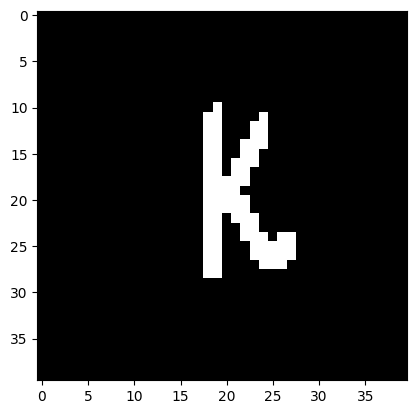

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(data1.shape)
print(labels2.shape)
print(y_train[13])
plt.imshow(1 - x_train[14], cmap='gray')

In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [33]:
model = models.Sequential()
# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(40, 40, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

# Flatten the output for the fully connected layers
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(layers.Dense(62, activation='softmax'))  # Adjust 'num_classes' as needed
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
39/39 [==============================] - 5s 105ms/step - loss: 4.1005 - accuracy: 0.0172 - val_loss: 4.0471 - val_accuracy: 0.0357
Epoch 2/50
39/39 [==============================] - 4s 99ms/step - loss: 4.0294 - accuracy: 0.0168 - val_loss: 3.9470 - val_accuracy: 0.0385
Epoch 3/50
39/39 [==============================] - 4s 99ms/step - loss: 3.8751 - accuracy: 0.0473 - val_loss: 3.6359 - val_accuracy: 0.1401
Epoch 4/50
39/39 [==============================] - 4s 104ms/step - loss: 3.5329 - accuracy: 0.0905 - val_loss: 3.0891 - val_accuracy: 0.2665
Epoch 5/50
39/39 [==============================] - 4s 95ms/step - loss: 3.0751 - accuracy: 0.1947 - val_loss: 2.5460 - val_accuracy: 0.3736
Epoch 6/50
39/39 [==============================] - 4s 112ms/step - loss: 2.7145 - accuracy: 0.2700 - val_loss: 2.1147 - val_accuracy: 0.4863
Epoch 7/50
39/39 [==============================] - 4s 107ms/step - loss: 2.3835 - accuracy: 0.3345 - val_loss: 1.7737 - val_accuracy: 0.5687
Epoch 8/5

In [34]:
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 38, 38, 32)        320       
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 19, 19, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_56 (Dropout)        (None, 19, 19, 32)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_57 (Dropout)        (None, 8, 8, 64)        

In [ ]:
# model = models.Sequential()
# model.add(layers.Conv2D(512,(5,5),activation='relu',input_shape=(100,100,3)))
# model.add(layers.MaxPool2D(2,2))
# model.add(layers.Conv2D(256,(3,3),activation='relu'))
# model.add(layers.MaxPool2D(2,2))
# model.add(layers.Conv2D(256,(3,3),activation='relu'))
# model.add(layers.MaxPool2D(2,2))
# model.add(layers.Flatten())
# model.add(layers.Dense(512,activation='relu'))
# model.add(layers.Dense(1024,activation='relu'))
# model.add(layers.Dense(512,activation='relu'))
# model.add(layers.Dense(256,activation='sigmoid'))
# model.add(layers.Dense(62,activation='softmax'))
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# history=model.fit(trainx,trainy,epochs=1,validation_data = (testx,testy))

12/12 - 0s - loss: 0.6688 - accuracy: 0.7885 - 144ms/epoch - 12ms/step


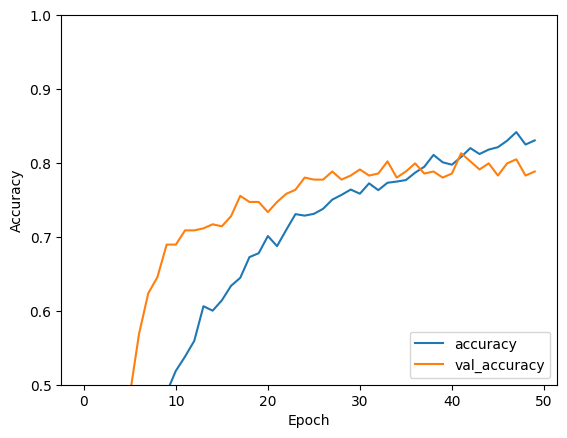

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [36]:
print(test_acc)

0.7884615659713745


(40, 40)


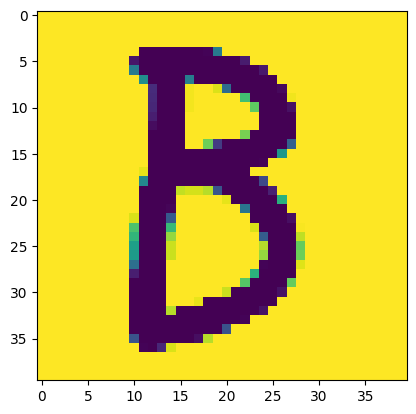

In [42]:
# Load the unknown image
unknown_image = cv2.imread('testimg.png')  # Replace 'unknown_image.jpg' with the path to your image
unknown_image = cv2.cvtColor(unknown_image, cv2.COLOR_BGR2GRAY)
# Resize the image to (40,40)
unknown_image = cv2.resize(unknown_image, (40,40))

# Normalize pixel values to the range [0, 1]
unknown_image_normalized = unknown_image/ 255.0
print(unknown_image.shape)
plt.imshow(unknown_image)

In [43]:
# Make predictions
predictions = model.predict(np.expand_dims(unknown_image, axis=0))
# Interpret the predictions
predicted_class_index = np.argmax(predictions)
print(factlabel[1][predicted_class_index])

1/1 [==============================] - 0s 62ms/step
S


In [ ]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "iris_classifier_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)